Replicate today’s workflow using TextBlob       
(Bonus, 15%): Scrape the website for ASCI      
Please submit one Python notebook file       

In [1]:
import tweepy
from textblob import TextBlob
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt

## Get Twitter Data

The following 'authdata1.csv' is the CSV file that contains of  the consumer key, consumer secret, token and token secret of my twitter Developer's app. I usd it to get the tweets for the airlines, 

Access the apps to the notebook

In [2]:
def getAuthData():
    import csv
    with open('authdata1.csv', 'r') as f:
        reader = csv.reader(f)
        your_list = list(reader)

    authdata = {}   
    for element in your_list:
        authdata[element[0]] = element[1]

    return authdata

In [3]:
getAuthData()

{'CONSUMER_KEY': 'GPKS57IHaA9RZbPMW31YEHG2N',
 'CONSUMER_SECRET': 'IVuDry5U5D2YGQtvGX8zRnqqgNvgj9RoJsSIdebcSVLsJOwPZd',
 'OAUTH_TOKEN': '930104792449503232-kLGFge1L5dG7dDjLMs4dfandJ4f7137',
 'OAUTH_TOKEN_SECRET': 'y6DHqnALEbeJlRccq4JK9nguI4qYIX04MBH5FN57ejg5G'}

In [4]:
authdata = getAuthData()

Get the tweets data for airline companies.

In [5]:
def getTwitterData(searchTerm, authdata):

    consumer_key = authdata['CONSUMER_KEY']
    consumer_secret = authdata['CONSUMER_SECRET']
    access_token = authdata['OAUTH_TOKEN']
    access_token_secret = authdata['OAUTH_TOKEN_SECRET']
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    
    searchCount = 1800 # The number of tweets you want ... you never get that !
     
    results = api.search(q=searchTerm, count=searchCount)

    print("Search completed ...")
    
    twts = []
    for result in results:
        twts.append(result.text)    

    print("List of tweets assembled ... for ", searchTerm)    
        
    return (twts)

Here, we get a list for each airline companies, each list contains of 100 tweets from the passengers of their flights.

In [6]:
Delta = getTwitterData('@Delta', authdata)
United = getTwitterData('@United', authdata)
USAirways = getTwitterData('@USAirways', authdata)
Southwest = getTwitterData('@Southwest', authdata)
American = getTwitterData('@American', authdata)
JetBlue = getTwitterData('@JetBlue', authdata)

Search completed ...
List of tweets assembled ... for  @Delta
Search completed ...
List of tweets assembled ... for  @United
Search completed ...
List of tweets assembled ... for  @USAirways
Search completed ...
List of tweets assembled ... for  @Southwest
Search completed ...
List of tweets assembled ... for  @American
Search completed ...
List of tweets assembled ... for  @JetBlue


## Score Sentiments

__I use textBlob to score the airlines, it is worth to mention that:__      
1. Every airline has 100 tweets from the comments of their passengers. Since textBolb can only score the polarity of a string, I use the __average score__ for 100 tweets as the final score for the airline company.
2. Beacuse the score we need to campared with is from a website which the scores of which range from 0 to 100, however, the score calculated by TextBlob is from -1 to 1, so I transfer the TextBlob score into hundred marked system by: __TextBlob * 50 + 50__

The function that calculated the average points all the tweets from the airline and transfer the TextBlob score into hundred marked system,

In [7]:
def getScore(airline):
    sum = 0 
    for tweet in airline:
        sum = sum + TextBlob(tweet).sentiment[0]
    score = round((sum/len(airline))*50 +50,2)
    return score

Obtain the twitter score for each airlines.

In [8]:
scores = {}

scores = {'American': getScore(American),
          'Delta': getScore(Delta),
          'JetBlue':  getScore(JetBlue),
          'Southwest': getScore(Southwest),
          'United': getScore(United),
          'USAirways': getScore(USAirways)
         }

print(scores)

{'American': 52.49, 'Delta': 55.96, 'JetBlue': 53.23, 'Southwest': 44.74, 'United': 52.77, 'USAirways': 47.45}


def getAirlineDataAlt():
    airlineDict = {}
    airlineDict = {'JetBlue':82, 
                   'Southwest':80,
                   'American':76,
                   'Delta':76,
                   'United':70
                  }
    return airlineDict

airlineScores = getAirlineDataAlt()

## Bonus Part: Get ASCI scores
Scrape the website for ASCI and get the data of the 2017 scores for airlines studies before and transform the data into a dataframe.

In [9]:
url = 'https://www.theacsi.org/index.php?option=com_content&view=article&id=149&catid=&Itemid=214&i=Airlines'
r = requests.get(url)
airlinesSatPage = r.text       
soup = bs(airlinesSatPage)
allRows = soup.find('body').findAll('tr',{'class':'Company'})

tableData = []
for row in allRows:
    eachRow = []
    cells = row.findAll('td',{'class':['Company','Baseline','Y1995','Y1996','Y1997','Y1998','Y1999','Y2000','Y2001','Y2002','Y2003','Y2004','Y2005','Y2006','Y2007','Y2008','Y2009','Y2010','Y2011','Y2012','Y2013','Y2014','Y2015','Y2016','Y2017','Y2018'] })
    for cell in cells:
        eachRow.append(str(cell.text.strip()))
    tableData.append(eachRow)    
    airline = [ x[0] for x in tableData ]
    Baseline   = [ x[1] for x in tableData ]
    Y2017   = [ x[24] for x in tableData ]
    airlineDict = { 'airlines': airline,
                 'airlineScore':Y2017
                   
                  }
acsi = pd.DataFrame(airlineDict)

acsi= pd.concat([acsi.iloc[2:4],acsi.iloc[0:1],acsi.iloc[5:8] ])
acsi = acsi.drop([6])
acsi = acsi.set_index('airlines')

/Users/liujingyi/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/liujingyi/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


## Score Airlines

The scores scraped from the website :

In [10]:
acsi

,airlineScore
airlines,
JetBlue,82
American,76
Southwest,80
Delta,76
United,70


The scores calculated by TextBlob from twitter

In [11]:
twdf = pd.DataFrame.from_dict(scores, orient='index')
twdf.columns = ['twitterScore']
twdf

,twitterScore
American,52.49
Delta,55.96
JetBlue,53.23
Southwest,44.74
United,52.77
USAirways,47.45


## Plot Histograms
Join the two scores into a single dataframe:

In [12]:
result = pd.concat([twdf, acsi], axis=1, join='inner')
result['airlineScore'] = result['airlineScore'].astype(int)

In [13]:
result

,twitterScore,airlineScore
American,52.49,76
Delta,55.96,76
JetBlue,53.23,82
Southwest,44.74,80
United,52.77,70


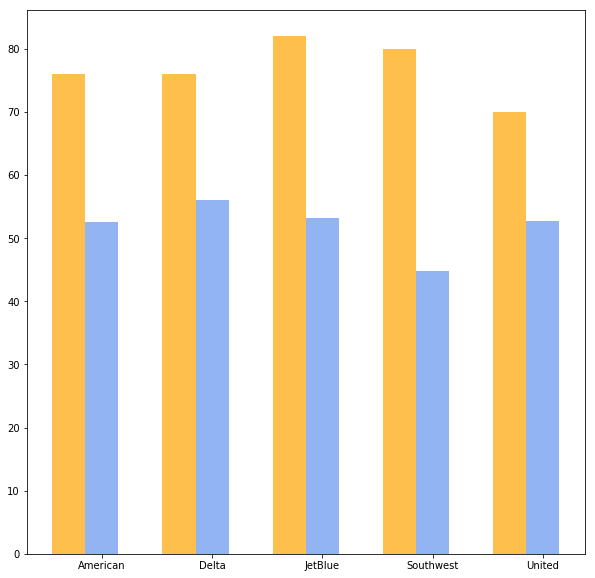

In [14]:
plt.figure(figsize=(10,10))

# Make a fake dataset:
height1 = result['airlineScore'].tolist()
bars1 = result.index.tolist()
y_pos1 = np.arange(len(bars1))

height2 = result['twitterScore'].tolist()
bars2 = result.index.tolist()
y_pos2 = np.arange(len(bars2))+0.3

# Create bars
plt.bar(y_pos1, height1 ,color = 'orange', width = 0.3, alpha = 0.7)
plt.bar(y_pos2, height2 ,color = 'cornflowerblue', width = 0.3, alpha = 0.7 )
 
# Create names on the x-axis
plt.xticks(y_pos2, bars2)


# Show graphic
plt.show()

##  Plot to Compare
__Draw the scatter plot to analysis the relationship between twitter scores and aieline scores.__      
There is no clear relastionship indicated by the scatter plot below.

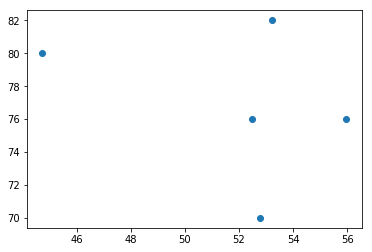

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(result['twitterScore'], result['airlineScore'])